```
Student-1
Name: Md Sarafat Ali Adir
ID# 20-41926-1
```

```
Student-2
Name: Hasin Aabrar Khan
ID# 21-45297-2
```

```
Student-3
Name: MD Tanvir Bin Zoha
ID# 21-45307-2
```



*   Mount your google drive.



In [9]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here



*   Import all necessary libraries.



In [10]:
# load/import all required library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np



•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [11]:
# write task-1 solution

# start writing your code here
df = pd.read_csv('heart_failure_dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [12]:
# write task-2 solution

# start writing your code here
duplicated_rows = df.duplicated().any()
print("Have Duplicated Rows: ", duplicated_rows)

empty_cells = df.isnull().sum().sum()
print("Number Of Empty Cells: ", empty_cells)

print("\nData Types:")
print(df.dtypes)

df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
median_bp = df['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].fillna(median_bp)

df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
median_cholesterol = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].fillna(median_cholesterol)

for x in df.index:
    if df.loc[x, 'Cholesterol'] > 450:
        df.loc[x, 'Cholesterol'] = 450


Have Duplicated Rows:  False
Number Of Empty Cells:  0

Data Types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

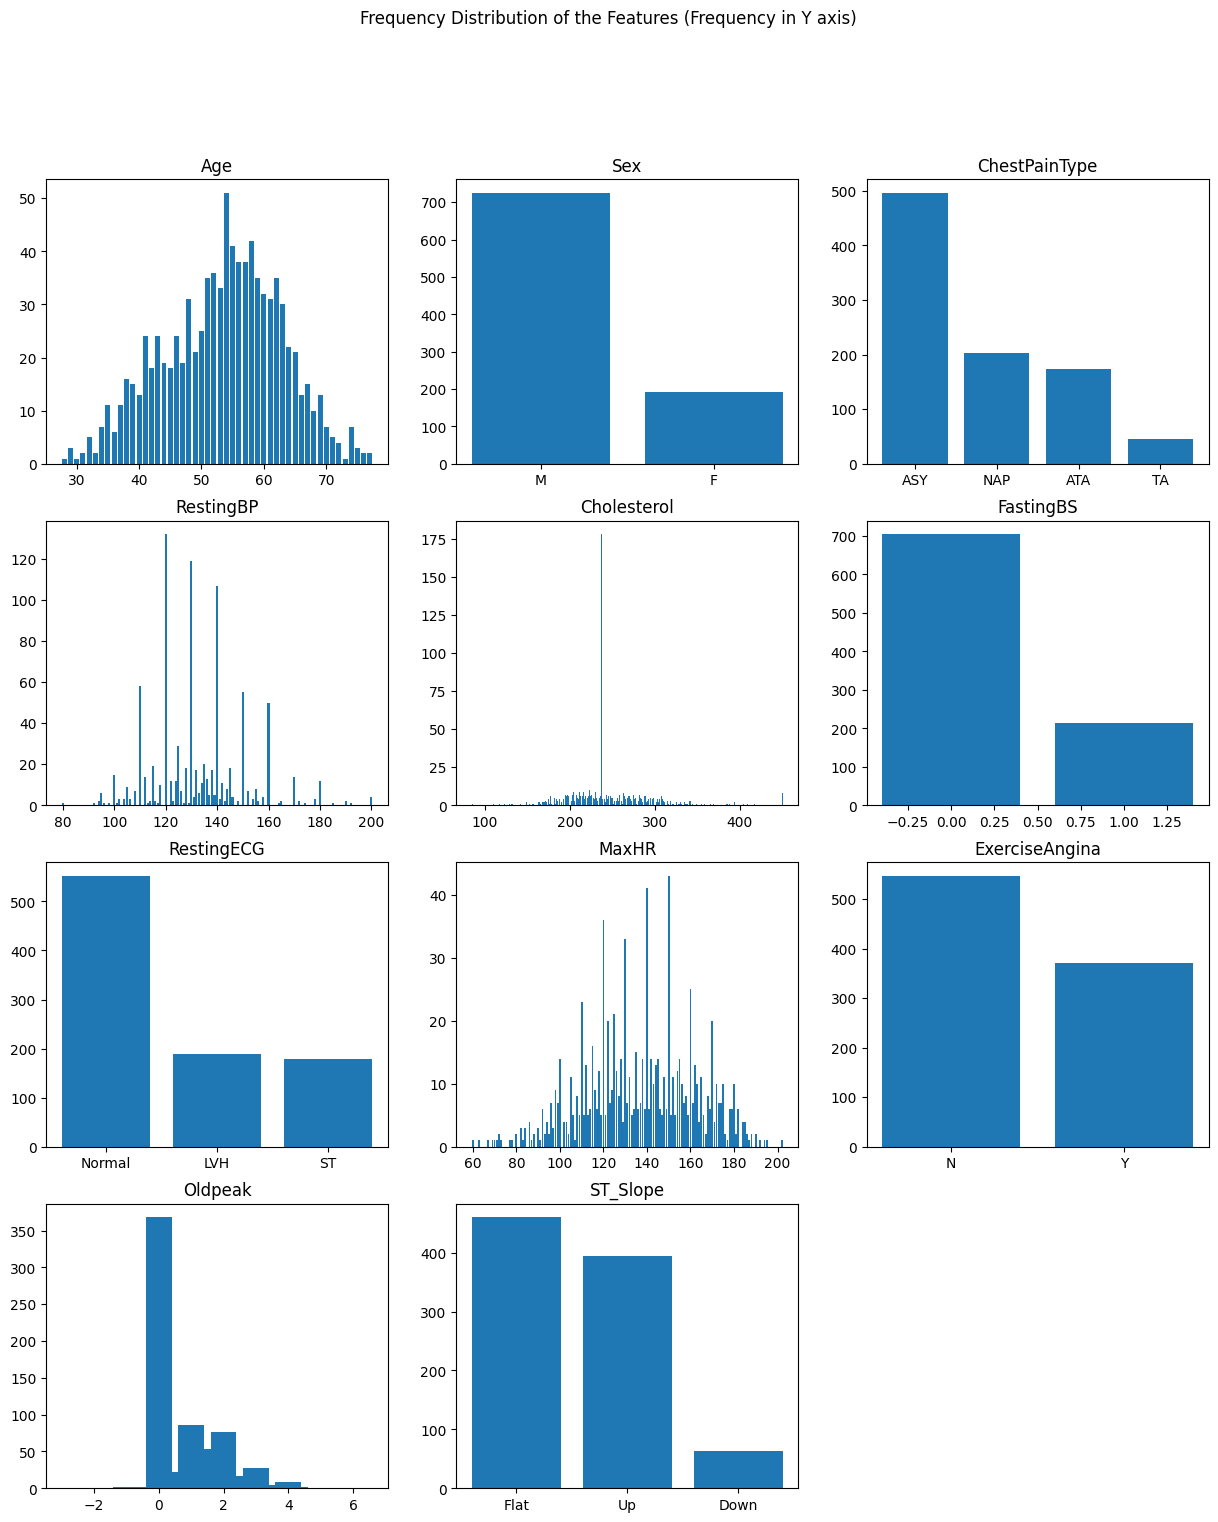

In [13]:
# write task-3 solution

# start writing your code here
plt.figure(figsize=(15, 17))

for i, column in enumerate(df.columns[:-1]):
  frequency = df[column].value_counts()
  plt.subplot(4, 3, i+1)
  plt.bar(frequency.index, frequency.values)
  plt.title(column)

plt.suptitle("Frequency Distribution of the Features (Frequency in Y axis)")
plt.show()

•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [14]:
# write task-4 solution

# start writing your code here

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

label_encoder = LabelEncoder()
for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])

print("\nData Types:")
print(df.dtypes)

all_features = df.columns
features = all_features[:-1]

X = df[features].copy()
y = df['HeartDisease']

scale = StandardScaler()
X[features] = scale.fit_transform(X)

print("\nFeatures After Scaling:")
print(X)


Data Types:
Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

Features After Scaling:
          Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140  0.515952       0.229032   0.415002     0.913960  -0.551341   
1   -0.478484 -1.938163       1.275059   1.527329    -1.235996  -0.551341   
2   -1.751359  0.515952       0.229032  -0.141161     0.795614  -0.551341   
3   -0.584556 -1.938163      -0.816995   0.303769    -0.565368  -0.551341   
4    0.051881  0.515952       1.275059   0.971166    -0.940131  -0.551341   
..        ...       ...            ...        ...          ...        ...   
913 -0.902775  0.515952       2.321086  -1.253488     0.420851  -0.551341   
914  1.536902  0.515

•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [19]:
# write task-5 solution

# start writing your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (734, 11) (734,)
Testing Data Shape: (184, 11) (184,)


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [16]:
# write task-6 solution

# start writing your code here

•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

In [17]:
# write task-7 solution

# start writing your code here

•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [18]:
# write task-8 solution

# start writing your code here